In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3830'
feature_detection_method = 'pasef'

In [3]:
MAXIMUM_Q_VALUE = 0.01

In [4]:
BASE_RESULTS_DIR = '/media/big-ssd'
# BASE_RESULTS_DIR = '/Users/darylwilding-mcbride/Downloads'.format(experiment_name)

#### identifications with correction for saturation

In [5]:
IDENTIFICATIONS_WITH_CS_DIR = '{}/results-P3830/P3830-results-cs-true-fmdw-false-2021-05-19-13-53-24/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_CS_DIR, experiment_name, feature_detection_method)

In [6]:
# load the identifications
with open(IDENTIFICATIONS_WITH_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_cs_df = d['identifications_df']
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_with_cs_df['protein id'].str.contains('YEAST'))]

In [7]:
s1 = identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,218,79.9
monoisotopic_saturated_adjusted,54,19.8
no_nonsaturated_isotopes,1,0.4


In [8]:
print('number of unique proteins: {}'.format(len(identifications_with_cs_df['protein id'].unique())))

number of unique proteins: 19


#### identifications without correction for saturation

In [9]:
IDENTIFICATIONS_WITHOUT_CS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-false-2021-05-19-17-54-56/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_CS_DIR, experiment_name, feature_detection_method)

In [10]:
# load the identifications
with open(IDENTIFICATIONS_WITHOUT_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_cs_df = d['identifications_df']
identifications_without_cs_df = identifications_without_cs_df[(identifications_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_without_cs_df['protein id'].str.contains('YEAST'))]

In [11]:
print('number of unique proteins: {}'.format(len(identifications_without_cs_df['protein id'].unique())))

number of unique proteins: 19


#### using the Top3 approach to determine protein quanitification

In [12]:
ups2_proteins_l = []

ups2_proteins_l.append({'uniprot':'P00915', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P00918', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P01031', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P69905', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P68871', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P41159', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P02768', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P62988', 'fmoles':50000})

ups2_proteins_l.append({'uniprot':'P04040', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P00167', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P01133', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P02144', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P15559', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P62937', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'Q06830', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P63165', 'fmoles':5000})

ups2_proteins_l.append({'uniprot':'P00709', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P06732', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P12081', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P61626', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'Q15843', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P02753', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P16083', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P63279', 'fmoles':500})

ups2_proteins_l.append({'uniprot':'P01008', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P61769', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P55957', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'O76070', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P08263', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01344', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01127', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P10599', 'fmoles':50})

ups2_proteins_l.append({'uniprot':'P99999', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P06396', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P09211', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01112', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01579', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P02787', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'O00762', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P51965', 'fmoles':5})

ups2_proteins_l.append({'uniprot':'P08758', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02741', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P05413', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10145', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02788', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10636-8', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P00441', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P01375', 'fmoles':0.5})

ups2_d = {}
for p in ups2_proteins_l:
    ups2_d[p['uniprot']] = p['fmoles']

#### with correction

In [13]:
identifications_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P00918ups|CAH2_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'P69905ups|HBA_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P62988ups|UBIQ_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_UPS,O76070ups|SYUG_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P63165ups|SUMO1_HUMAN_UPS',
       'P62937ups|PPIA_HUMAN_UPS'], dtype=object)

In [14]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_with_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_with_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [15]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_with_df[top3_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

2319.0333333333333

In [16]:
top3_with_df['calculated_pmoles'] = top3_with_df.average_intensity / universal_signal_response_factor

In [17]:
# calculate the CV for the signal response factor
cv = top3_with_df.signal_response_factor.std() / top3_with_df.signal_response_factor.mean()
cv

1.1493894200596158

In [18]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_with_df[(top3_with_df.intensity_adjusted == True)]) / len(top3_with_df) * 100,1))

'64.3% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [19]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_without_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_without_df = pd.DataFrame(top3_l)

didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS


In [20]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_without_df[top3_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1715.8933333333334

In [21]:
top3_without_df['calculated_pmoles'] = top3_without_df.average_intensity / universal_signal_response_factor

In [22]:
# calculate the CV for the signal response factor
cv = top3_without_df.signal_response_factor.std() / top3_without_df.signal_response_factor.mean()
cv

1.1731338296562206

#### calculate correlation

In [23]:
combined_df = pd.merge(top3_with_df, top3_without_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_with','_without'])

In [24]:
len(combined_df)

14

In [25]:
combined_df[['pmoles_with','average_intensity_with','average_intensity_without','calculated_pmoles_with','calculated_pmoles_without']].sample(n=10)

,pmoles_with,average_intensity_with,average_intensity_without,calculated_pmoles_with,calculated_pmoles_without
13,5.0,8234.333333,8234.333333,3.550761,4.798861
11,50.0,48142.000000,39346.000000,20.759512,22.930330
1,50.0,50845.666667,44935.333333,21.925371,26.187720
10,5.0,1740.000000,1740.000000,0.750313,1.014049
8,50.0,35351.333333,31006.666667,15.243995,18.070276
3,5.0,6118.000000,6118.000000,2.638168,3.565490
4,50.0,115951.666667,85794.666667,50.000000,50.000000
9,5.0,3289.000000,3289.000000,1.418263,1.916786
0,50.0,51605.000000,46840.000000,22.252806,27.297734
7,5.0,14905.666667,13049.333333,6.427534,7.604979


In [26]:
combined_df[combined_df.protein.str.startswith('P02768')]

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
4,P02768ups|ALBU_HUMAN_UPS,50.0,115951.666667,2319.033333,129,True,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0,50.0,85794.666667,1715.893333,127,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL...",50.0


In [28]:
universal_signal_response_factor_with = combined_df[combined_df.protein.str.startswith('P15559')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_df[combined_df.protein.str.startswith('P15559')].iloc[0].signal_response_factor_without

In [29]:
combined_df['calculated_pmoles_with'] = combined_df.average_intensity_with / universal_signal_response_factor_with
combined_df['calculated_pmoles_without'] = combined_df.average_intensity_without / universal_signal_response_factor_without

In [30]:
combined_df['pmoles_with'].corr(combined_df['calculated_pmoles_with'])

0.6753453132806627

In [31]:
combined_df['pmoles_without'].corr(combined_df['calculated_pmoles_without'])

0.6865460617111798

### analyse UPS1

#### identifications with correction for saturation

In [37]:
IDENTIFICATIONS_UPS1_WITH_CS_DIR = '{}/results-P3830/P3830-results-cs-true-fmdw-false-2021-05-24-23-44-18/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_UPS1_WITH_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_UPS1_WITH_CS_DIR, experiment_name, feature_detection_method)

In [38]:
# load the identifications
with open(IDENTIFICATIONS_UPS1_WITH_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_UPS1_with_cs_df = d['identifications_df']
identifications_UPS1_with_cs_df = identifications_UPS1_with_cs_df[(identifications_UPS1_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_with_cs_df['protein id'].str.contains('YEAST'))]

In [39]:
s1 = identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,338,92.1
monoisotopic_saturated_adjusted,29,7.9


In [40]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_with_cs_df['protein id'].unique())))

number of unique proteins: 46


#### identifications without correction for saturation

In [41]:
IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR = '{}/results-P3830/P3830-results-cs-false-fmdw-false-2021-05-25-04-07-05/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR, experiment_name, feature_detection_method)

In [42]:
# load the identifications
with open(IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_UPS1_without_cs_df = d['identifications_df']
identifications_UPS1_without_cs_df = identifications_UPS1_without_cs_df[(identifications_UPS1_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_without_cs_df['protein id'].str.contains('YEAST'))]

In [43]:
s1 = identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,339,92.1
monoisotopic_saturated_adjusted,29,7.9


In [44]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_without_cs_df['protein id'].unique())))

number of unique proteins: 46


### relative abundance of proteins found in common between UPS1 and UPS2

#### with correction

In [45]:
identifications_UPS1_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00441ups|SODC_HUMAN_UPS',
       'P10636-8ups|TAU_HUMAN_UPS', 'P02787ups|TRFE_HUMAN_UPS',
       'P08758ups|ANXA5_HUMAN_UPS', 'P00918ups|CAH2_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'Q06830ups|PRDX1_HUMAN_UPS',
       'P06396ups|GELS_HUMAN_UPS', 'O76070ups|SYUG_HUMAN_UPS',
       'P04040ups|CATA_HUMAN_UPS', 'P02788ups|TRFL_HUMAN_UPS',
       'P10145ups|IL8_HUMAN_UPS', 'Q15843ups|NEDD8_HUMAN_UPS',
       'P01008ups|ANT3_HUMAN_UPS', 'P12081ups|SYHC_HUMAN_UPS',
       'P00167ups|CYB5_HUMAN_UPS', 'P00709ups|LALBA_HUMAN_UPS',
       'P55957ups|BID_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P68871ups|HBB_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'O00762ups|UBE2C_HUMAN_UPS', 'P41159ups|LEP_HUMAN_UPS',
       'P09211ups|GSTP1_HUMAN_UPS', 'P05413ups|FABPH_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P15559ups|NQO1_HUMAN_UPS',
       'P08263ups|GSTA1_HUMAN_UPS', 'P16083ups|NQO2_HUMAN_UPS',
       'P99999ups|CYC_HUMAN_UPS', 'P61769ups|B2MG_HU

In [46]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_with_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_UPS1_with_df = pd.DataFrame(top3_l)

didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
didn't have three peptides for P02741ups|CRP_HUMAN_UPS
didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
didn't have three peptides for P10145ups|IL8_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_UPS,O76070ups|SYUG_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
didn't have three peptides for P69905ups|HBA_HUMAN_UPS
didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS


In [47]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_with_df[top3_UPS1_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1119.18

In [48]:
top3_UPS1_with_df['calculated_pmoles'] = top3_UPS1_with_df.average_intensity / universal_signal_response_factor

In [49]:
# calculate the CV for the signal response factor
cv = top3_UPS1_with_df.signal_response_factor.std() / top3_UPS1_with_df.signal_response_factor.mean()
cv

2.3555760100692424

In [50]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_UPS1_with_df[(top3_UPS1_with_df.intensity_adjusted == True)]) / len(top3_UPS1_with_df) * 100,1))

'53.1% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [51]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_without_cs_df.groupby('protein id'):
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = group_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'protein':group_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('didn\'t have three peptides for {}'.format(group_name))
top3_UPS1_without_df = pd.DataFrame(top3_l)

didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
didn't have three peptides for P02741ups|CRP_HUMAN_UPS
didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
didn't have three peptides for P10145ups|IL8_HUMAN_UPS
didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS
didn't have three peptides for P62937ups|PPIA_HUMAN_UPS,P62988ups|UBIQ_HUMAN_UPS,O76070ups|SYUG_HUMAN_UPS
didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
didn't have three peptides for P69905ups|HBA_HUMAN_UPS
didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS


In [52]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_without_df[top3_UPS1_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

775.5866666666667

In [53]:
top3_UPS1_without_df['calculated_pmoles'] = top3_UPS1_without_df.average_intensity / universal_signal_response_factor

In [54]:
# calculate the CV for the signal response factor
cv = top3_UPS1_without_df.signal_response_factor.std() / top3_UPS1_without_df.signal_response_factor.mean()
cv

2.3819505131315406

#### calculate correlation

In [55]:
combined_UPS1_df = pd.merge(top3_UPS1_with_df, top3_UPS1_without_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_with','_without'])

In [56]:
len(combined_UPS1_df)

32

In [57]:
combined_UPS1_df[['pmoles_with','average_intensity_with','average_intensity_without','calculated_pmoles_with','calculated_pmoles_without']].sample(n=10)

,pmoles_with,average_intensity_with,average_intensity_without,calculated_pmoles_with,calculated_pmoles_without
12,5.0000,8067.666667,8067.666667,7.208551,10.402018
18,0.0005,8732.000000,8732.000000,7.802141,11.258574
9,0.0050,4801.000000,4801.000000,4.289748,6.190153
17,5.0000,48598.000000,42211.333333,43.422863,54.425037
3,0.0005,29713.333333,29713.333333,26.549200,38.310784
25,0.5000,5469.666667,5469.666667,4.887209,7.052296
4,0.5000,9668.000000,9668.000000,8.638467,12.465403
14,50.0000,55959.000000,38779.333333,50.000000,50.000000
20,0.5000,13709.000000,13709.000000,12.249147,17.675652
30,0.0050,5499.000000,5499.000000,4.913419,7.090117


In [58]:
combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')]

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
14,P02768ups|ALBU_HUMAN_UPS,50.0,55959.0,1119.18,47,True,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.0,50.0,38779.333333,775.586667,48,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.0


In [59]:
combined_UPS1_df.sort_values(by=['pmoles_with'], ascending=False, inplace=False)

,protein,pmoles_with,average_intensity_with,signal_response_factor_with,peptide_count_with,intensity_adjusted,attribs_d_with,calculated_pmoles_with,pmoles_without,average_intensity_without,signal_response_factor_without,peptide_count_without,attribs_d_without,calculated_pmoles_without
29,P68871ups|HBB_HUMAN_UPS,50.0000,12399.666667,2.479933e+02,5,True,"[{'feature_id': 3039101, 'sequence': 'VLGAFSDG...",11.079243,50.0000,12064.000000,2.412800e+02,5,"[{'feature_id': 3039101, 'sequence': 'VLGAFSDG...",15.554677
26,P41159ups|LEP_HUMAN_UPS,50.0000,12501.666667,2.500333e+02,11,True,"[{'feature_id': 534101, 'sequence': 'INDISHTQS...",11.170381,50.0000,11909.666667,2.381933e+02,11,"[{'feature_id': 534101, 'sequence': 'INDISHTQS...",15.355688
14,P02768ups|ALBU_HUMAN_UPS,50.0000,55959.000000,1.119180e+03,47,True,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.000000,50.0000,38779.333333,7.755867e+02,48,"[{'feature_id': 5142901, 'sequence': 'MPCAEDYL...",50.000000
5,P00915ups|CAH1_HUMAN_UPS,50.0000,9993.333333,1.998667e+02,10,False,"[{'feature_id': 1030401, 'sequence': 'HDTSLKPI...",8.929156,50.0000,9993.333333,1.998667e+02,10,"[{'feature_id': 1030401, 'sequence': 'HDTSLKPI...",12.884870
6,P00918ups|CAH2_HUMAN_UPS,50.0000,19678.666667,3.935733e+02,8,True,"[{'feature_id': 5162501, 'sequence': 'AVQQPDGL...",17.583111,50.0000,19202.666667,3.840533e+02,8,"[{'feature_id': 5162501, 'sequence': 'AVQQPDGL...",24.758892
8,P01031ups|CO5_HUMAN_UPS,50.0000,16776.000000,3.355200e+02,3,True,"[{'feature_id': 675301, 'sequence': 'CCYDGACVN...",14.989546,50.0000,13078.333333,2.615667e+02,3,"[{'feature_id': 675301, 'sequence': 'CCYDGACVN...",16.862504
31,Q06830ups|PRDX1_HUMAN_UPS,5.0000,11774.333333,2.354867e+03,5,True,"[{'feature_id': 813601, 'sequence': 'HGEVCPAGW...",10.520500,5.0000,11610.333333,2.322067e+03,5,"[{'feature_id': 813601, 'sequence': 'HGEVCPAGW...",14.969743
17,P04040ups|CATA_HUMAN_UPS,5.0000,48598.000000,9.719600e+03,15,True,"[{'feature_id': 4060101, 'sequence': 'GPLLVQDV...",43.422863,5.0000,42211.333333,8.442267e+03,15,"[{'feature_id': 4060101, 'sequence': 'GPLLVQDV...",54.425037
12,P02144ups|MYG_HUMAN_UPS,5.0000,8067.666667,1.613533e+03,7,False,"[{'feature_id': 709101, 'sequence': 'HPGDFGADA...",7.208551,5.0000,8067.666667,1.613533e+03,7,"[{'feature_id': 709101, 'sequence': 'HPGDFGADA...",10.402018
28,P63165ups|SUMO1_HUMAN_UPS,5.0000,2482.000000,4.964000e+02,3,False,"[{'feature_id': 3229301, 'sequence': 'LLLEYLEE...",2.217695,5.0000,2482.000000,4.964000e+02,3,"[{'feature_id': 3229301, 'sequence': 'LLLEYLEE...",3.200158


In [60]:
universal_signal_response_factor_with = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_without

In [61]:
combined_UPS1_df['calculated_pmoles_with'] = combined_UPS1_df.average_intensity_with / universal_signal_response_factor_with
combined_UPS1_df['calculated_pmoles_without'] = combined_UPS1_df.average_intensity_without / universal_signal_response_factor_without

In [62]:
combined_UPS1_df['pmoles_with'].corr(combined_UPS1_df['calculated_pmoles_with'])

0.20665072017725014

In [63]:
combined_UPS1_df['pmoles_without'].corr(combined_UPS1_df['calculated_pmoles_without'])

0.13377350168611465

### compare relative intensities of top-3 peptides for each protein found in common in UPS2 and UPS1

In [64]:
ratios_df = pd.merge(combined_df[['protein','average_intensity_with','average_intensity_without']], combined_UPS1_df[['protein','average_intensity_with','average_intensity_without']], how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_UPS2','_UPS1'])


In [65]:
ratios_df['ratio_with'] = ratios_df.average_intensity_with_UPS2 / ratios_df.average_intensity_with_UPS1
ratios_df['ratio_without'] = ratios_df.average_intensity_without_UPS2 / ratios_df.average_intensity_without_UPS1

In [66]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / 5.0, axis=1)
ratios_df['protein_code'] = ratios_df.apply(lambda row: row.protein.split('ups')[0], axis=1)

In [67]:
ratios_df.sort_values(by=['expected_ratio'], ascending=False, inplace=True)

In [68]:
ratios_df

,protein,average_intensity_with_UPS2,average_intensity_without_UPS2,average_intensity_with_UPS1,average_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code
0,P00915ups|CAH1_HUMAN_UPS,51605.000000,46840.000000,9993.333333,9993.333333,5.163943,4.687125,10.0,P00915
1,P00918ups|CAH2_HUMAN_UPS,50845.666667,44935.333333,19678.666667,19202.666667,2.583796,2.340057,10.0,P00918
2,P01031ups|CO5_HUMAN_UPS,38038.333333,21637.666667,16776.000000,13078.333333,2.267426,1.654467,10.0,P01031
4,P02768ups|ALBU_HUMAN_UPS,115951.666667,85794.666667,55959.000000,38779.333333,2.072083,2.212381,10.0,P02768
7,P41159ups|LEP_HUMAN_UPS,35351.333333,31006.666667,12501.666667,11909.666667,2.827730,2.603487,10.0,P41159
9,P68871ups|HBB_HUMAN_UPS,48142.000000,39346.000000,12399.666667,12064.000000,3.882524,3.261439,10.0,P68871
3,P02144ups|MYG_HUMAN_UPS,6118.000000,6118.000000,8067.666667,8067.666667,0.758336,0.758336,1.0,P02144
5,P04040ups|CATA_HUMAN_UPS,40783.666667,35444.000000,48598.000000,42211.333333,0.839205,0.839680,1.0,P04040
8,P63165ups|SUMO1_HUMAN_UPS,1740.000000,1740.000000,2482.000000,2482.000000,0.701048,0.701048,1.0,P63165
10,Q06830ups|PRDX1_HUMAN_UPS,8234.333333,8234.333333,11774.333333,11610.333333,0.699346,0.709225,1.0,Q06830


In [69]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

0.8418835601816663

In [70]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])

0.8297629486953068

#### include MQ results for comparison

In [93]:
# read the MQ ratios from the notebook "paper 2 - UPS2 identifications with MaxQuant"
mq_ratios_df = pd.read_pickle('{}/mq_ratios_ups1_ups2.pkl'.format(expanduser('~')))

In [94]:
mq_ratios_df.columns

Index(['protein', 'average_intensity_UPS2', 'average_intensity_UPS1', 'ratio',
       'expected_ratio', 'protein_code'],
      dtype='object')

In [102]:
# and combine them with the other results for plotting
combined_ratios_df = pd.merge(ratios_df, mq_ratios_df[['protein','ratio']], how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_TFDE','_MQ'])
combined_ratios_df.rename(columns={'ratio': 'mq_ratio'}, inplace=True)

In [103]:
combined_ratios_df

,protein,average_intensity_with_UPS2,average_intensity_without_UPS2,average_intensity_with_UPS1,average_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code,mq_ratio
0,P00915ups|CAH1_HUMAN_UPS,51605.000000,46840.000000,9993.333333,9993.333333,5.163943,4.687125,10.0,P00915,6.718963
1,P00918ups|CAH2_HUMAN_UPS,50845.666667,44935.333333,19678.666667,19202.666667,2.583796,2.340057,10.0,P00918,3.008845
2,P01031ups|CO5_HUMAN_UPS,38038.333333,21637.666667,16776.000000,13078.333333,2.267426,1.654467,10.0,P01031,0.633459
3,P02768ups|ALBU_HUMAN_UPS,115951.666667,85794.666667,55959.000000,38779.333333,2.072083,2.212381,10.0,P02768,2.743569
4,P41159ups|LEP_HUMAN_UPS,35351.333333,31006.666667,12501.666667,11909.666667,2.827730,2.603487,10.0,P41159,2.059451
5,P68871ups|HBB_HUMAN_UPS,48142.000000,39346.000000,12399.666667,12064.000000,3.882524,3.261439,10.0,P68871,2.623932
6,P02144ups|MYG_HUMAN_UPS,6118.000000,6118.000000,8067.666667,8067.666667,0.758336,0.758336,1.0,P02144,1.140764
7,P04040ups|CATA_HUMAN_UPS,40783.666667,35444.000000,48598.000000,42211.333333,0.839205,0.839680,1.0,P04040,0.529186
8,P63165ups|SUMO1_HUMAN_UPS,1740.000000,1740.000000,2482.000000,2482.000000,0.701048,0.701048,1.0,P63165,0.353077
9,Q06830ups|PRDX1_HUMAN_UPS,8234.333333,8234.333333,11774.333333,11610.333333,0.699346,0.709225,1.0,Q06830,0.204661


In [99]:
combined_ratios_df['mq_ratio'].corr(combined_ratios_df['expected_ratio'])

0.652762504346444

#### plot the comparison

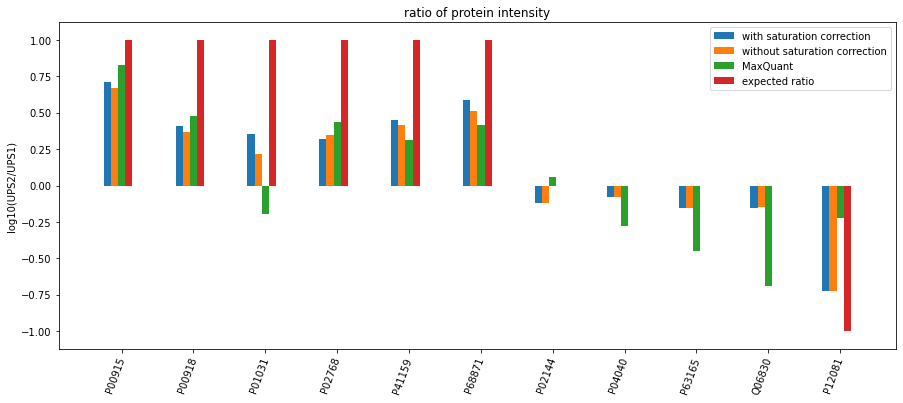

In [105]:
labels = combined_ratios_df.protein_code
ratio_with = np.log10(combined_ratios_df.ratio_with)
ratio_without = np.log10(combined_ratios_df.ratio_without)
mq_ratio = np.log10(combined_ratios_df.mq_ratio)
expected_ratio = np.log10(combined_ratios_df.expected_ratio)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

f, ax = plt.subplots()
f.set_figheight(6)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

rects1 = ax.bar(x - 2*width, ratio_with, width, label='with saturation correction')
rects2 = ax.bar(x - width, ratio_without, width, label='without saturation correction')
rects3 = ax.bar(x, mq_ratio, width, label='MaxQuant')
rects4 = ax.bar(x + width, expected_ratio, width, label='expected ratio')

# add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log10(UPS2/UPS1)')
ax.set_title('ratio of protein intensity')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70, ha='right')
ax.legend()

# create offset transform (x=5pt)
from matplotlib.transforms import ScaledTranslation
dx, dy = 5, 0
offset = ScaledTranslation(dx/f.dpi, dy/f.dpi, scale_trans=f.dpi_scale_trans)

# apply offset transform to all xticklabels
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.show()

### compare relative intensities of top-3 peptides for each protein in UPS2 relative to a protein that was not corrected for saturation

In [ ]:
ratios_df = combined_df[['protein','average_intensity_with','average_intensity_without','intensity_adjusted']].copy()


#### use for the intensity reference the most intense protein that was not corrected for saturation

In [ ]:
reference_row = combined_df[combined_df.protein.str.startswith('Q06830')].iloc[0]
reference_intensity = reference_row.average_intensity_with

In [ ]:
ratios_df['ratio_with'] = ratios_df.average_intensity_with / reference_intensity
ratios_df['ratio_without'] = ratios_df.average_intensity_without / reference_intensity

In [ ]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / (ups2_d[reference_row.protein.split('ups')[0]] / 1000), axis=1)

In [ ]:
ratios_df

In [ ]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

In [ ]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])